In [185]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np
import pandas
import csv
import re
from matplotlib import pyplot as plt

In [186]:
# Helper function to plot the classification results
def plot_label(results, name):
    labels = [ 'income', 'leisure', 'private', 'standardOfLiving', 'finance', 'living' ]
    classification = results.get(name, {})
    count = np.zeros(len(labels))

    total = 0
    for i in range(0, len(labels)):
        count[i] = classification.get(labels[i], 0)
        total += count[i]

    count = count * 100 / total
    index = range(0, len(labels))

    plt.clf()
    plt.bar(index, count)
    plt.axis(ymin = 0, ymax = 100)
    plt.xlabel('Classified as', fontsize=10)
    plt.ylabel('Percentage of classified rows', fontsize=12)
    plt.xticks(index, labels, fontsize=10, rotation=45)
    plt.title('Classification results for *given* label "' + name + '"')
    plt.show()

In [187]:
# Parse Input
df = pandas.read_csv('Exercise 1 - Transaction Classification - Data Set.csv', sep=';')
print(df.label.value_counts())

leisure             65
standardOfLiving    47
finance             33
living              26
private             21
income              17
Name: label, dtype: int64


In [188]:
# List frequently used words - used for *manual* filtering
vec = CountVectorizer(min_df = 0.35)
vecRes = vec.fit_transform(df['Buchungstext'] + df['Verwendungszweck'])
print(vec.get_feature_names())

['einzugsermächtigung', 'lastschrift']


In [218]:
# Preprocessing

i_rows = int(df.shape[0])
X = []
Y = []
for i in range(0, i_rows):
    # Process data the same way as in the training set
    f_betrag = float(str(df['Betrag'][i]).replace(',', '.'))

    s_betrag_flag = 'BETRAG_NEG'
    if f_betrag > 0:
        s_betrag_flag = 'BETRAG_POS'

    X.append(df['Buchungstext'][i] + ' ' + df['Verwendungszweck'][i] + ' ' + s_betrag_flag)
    Y.append(str(df['label'][i]))

In [237]:
# Run multiple tests

runs = 5

X = np.asarray(X)
Y = np.asarray(Y)
accuracy = 0
results = {}

# These words occur in >= 35% of the rows but no given label is represented that often
blacklist = [ 'einzugsermächtigung', 'lastschrift' ]

kfold = KFold(n_splits=runs, shuffle=True)
for index, foo in enumerate(kfold.split(X)):

    # Initialize
    train_index, test_index = foo
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    classifier = GaussianNB()
    vec = CountVectorizer(lowercase=True, stop_words=blacklist)

    # Train
    vecRes = vec.fit_transform(X_train)
    classifier.fit(vecRes.toarray(), Y_train)

    # Predict
    testVec = vec.transform(X_test).toarray()
    predictedLabels = classifier.predict(testVec)

    # Accuracy measurement
    accuracy += accuracy_score(Y_test, predictedLabels)

    # Collect classification results as seen in the graphs below
    for i in range(0, len(X_test)):
        given = str(Y_test[i])
        pred = str(predictedLabels[i])

        # 2D Dictionary Access: Dictionary of Dictionaries of ints
        # 1st index specifies "given label"
        # 2nd index specifies "predicted label"
        tmp = results.get(given, {})
        if tmp == {}:
            results[given] = {}

        results[given][pred] = tmp.get(pred, 0) + 1

print('Average Accuracy = ' + str(accuracy / runs))

Average Accuracy = 0.9233449477351916


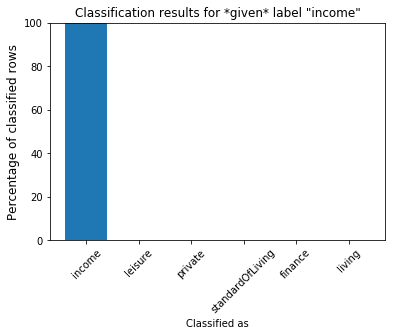

In [238]:
plot_label(results, 'income')

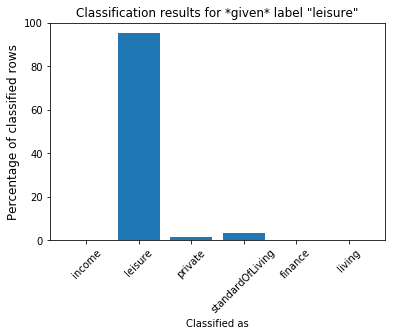

In [239]:
plot_label(results, 'leisure')

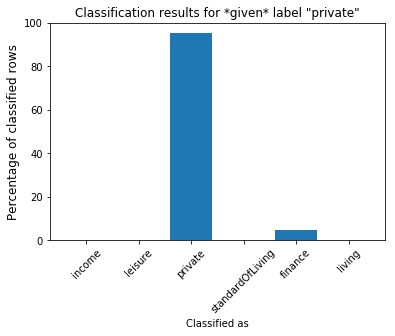

In [240]:
plot_label(results, 'private')

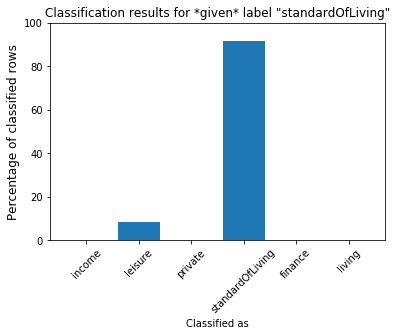

In [241]:
plot_label(results, 'standardOfLiving')

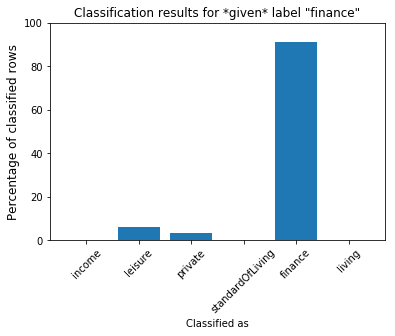

In [242]:
plot_label(results, 'finance')

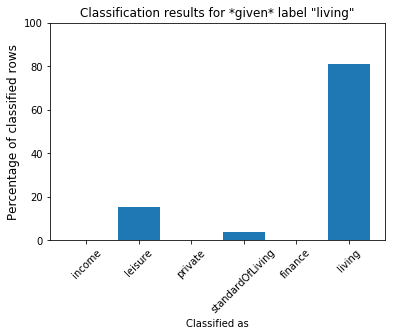

In [243]:
plot_label(results, 'living')